# Visualização de dados financeiros

 # Importação das bibliotecas

In [1]:
import pandas as pd  
import numpy as np 
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, datetime

# Base de dados com uma ação

In [2]:
gol_df = data.DataReader(name= 'GOLL4.SA', data_source= 'yahoo', start='2015-01-01')

In [3]:
gol_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.200000,14.610000,14.970000,14.99,901900.0,14.99
2015-01-05,15.010000,14.410000,14.900000,14.85,1272500.0,14.85
2015-01-06,15.210000,14.650000,14.750000,15.21,2183500.0,15.21
2015-01-07,15.330000,14.550000,15.150000,14.55,1846900.0,14.55
2015-01-08,14.650000,14.200000,14.410000,14.27,1569500.0,14.27
...,...,...,...,...,...,...
2021-01-19,24.280001,23.030001,24.090000,23.24,6863200.0,23.24
2021-01-20,23.700001,22.530001,23.459999,23.23,6392100.0,23.23
2021-01-21,23.250000,22.410000,23.129999,22.76,5807400.0,22.76


In [4]:
# renomeando colunas
gol_df.rename({'High': 'Alto','Low':'Baixo','Open':'Abrir','Close':'Fechamento','Adj Close':'Fechamento Ajustado'},axis=1,inplace=True)
gol_df

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
Date,,,,,,
2015-01-02,15.200000,14.610000,14.970000,14.99,901900.0,14.99
2015-01-05,15.010000,14.410000,14.900000,14.85,1272500.0,14.85
2015-01-06,15.210000,14.650000,14.750000,15.21,2183500.0,15.21
2015-01-07,15.330000,14.550000,15.150000,14.55,1846900.0,14.55
2015-01-08,14.650000,14.200000,14.410000,14.27,1569500.0,14.27
...,...,...,...,...,...,...
2021-01-19,24.280001,23.030001,24.090000,23.24,6863200.0,23.24
2021-01-20,23.700001,22.530001,23.459999,23.23,6392100.0,23.23
2021-01-21,23.250000,22.410000,23.129999,22.76,5807400.0,22.76


In [5]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1504 entries, 2015-01-02 to 2021-01-26
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Alto                 1504 non-null   float64
 1   Baixo                1504 non-null   float64
 2   Abrir                1504 non-null   float64
 3   Fechamento           1504 non-null   float64
 4   Volume               1504 non-null   float64
 5   Fechamento Ajustado  1504 non-null   float64
dtypes: float64(6)
memory usage: 82.2 KB


In [6]:
# Os seis primeiros registros do conjunto de dados
gol_df.head(6)

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
Date,,,,,,
2015-01-02,15.20,14.61,14.97,14.99,901900.0,14.99
2015-01-05,15.01,14.41,14.90,14.85,1272500.0,14.85
2015-01-06,15.21,14.65,14.75,15.21,2183500.0,15.21
2015-01-07,15.33,14.55,15.15,14.55,1846900.0,14.55
2015-01-08,14.65,14.20,14.41,14.27,1569500.0,14.27
2015-01-09,14.33,13.84,14.14,14.05,1270300.0,14.05


In [7]:
# Os seis últimos registros do dataset
gol_df.tail(6)

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
Date,,,,,,
2021-01-18,24.940001,23.580000,24.010000,23.790001,8911200.0,23.790001
2021-01-19,24.280001,23.030001,24.090000,23.240000,6863200.0,23.240000
2021-01-20,23.700001,22.530001,23.459999,23.230000,6392100.0,23.230000
2021-01-21,23.250000,22.410000,23.129999,22.760000,5807400.0,22.760000
2021-01-22,22.900000,21.719999,22.040001,22.670000,5223900.0,22.670000
2021-01-26,22.820000,22.350000,22.820000,22.410000,759200.0,22.410000


In [8]:
# Estatísticas numéricas de janeiro de 2015 a janeiro de 2021 
gol_df.describe()

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
count,1504.000000,1504.000000,1504.000000,1504.000000,1.504000e+03,1504.000000
mean,15.314648,14.547407,14.940951,14.905991,4.726867e+06,14.905991
std,10.395840,10.001983,10.200870,10.196932,4.910613e+06,10.196932
min,1.180000,1.130000,1.160000,1.160000,0.000000e+00,1.160000
25%,7.115000,6.660000,6.897500,6.922500,1.812950e+06,6.922500
50%,12.840000,12.000000,12.450000,12.385000,3.036500e+06,12.385000
75%,21.752500,20.520000,21.112500,21.022501,5.810700e+06,21.022501
max,44.619999,41.310001,43.669998,43.790001,4.368050e+07,43.790001


In [9]:
#  A ação da Gol teve maior valor no Fechamento em que data?
gol_df[gol_df['Fechamento'] >= 43.79]

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
Date,,,,,,
2019-08-01,44.619999,41.25,41.25,43.790001,6664200.0,43.790001


In [10]:
# A A ação da Gol teve menor valor no Fechamento em que data?
gol_df[(gol_df['Fechamento'] >= 1.15) &(gol_df['Fechamento'] <= 1.16)]

,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
Date,,,,,,
2016-01-22,1.26,1.14,1.2,1.16,3830600.0,1.16


In [11]:
# Para salvar a base de dados e evitar que haja algum problema de comunicação com a source
gol_df.to_csv('gol.csv')

In [12]:
gol_df2 = pd.read_csv('gol.csv')
gol_df2

,Date,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
0,2015-01-02,15.200000,14.610000,14.970000,14.99,901900.0,14.99
1,2015-01-05,15.010000,14.410000,14.900000,14.85,1272500.0,14.85
2,2015-01-06,15.210000,14.650000,14.750000,15.21,2183500.0,15.21
3,2015-01-07,15.330000,14.550000,15.150000,14.55,1846900.0,14.55
4,2015-01-08,14.650000,14.200000,14.410000,14.27,1569500.0,14.27
...,...,...,...,...,...,...,...
1499,2021-01-19,24.280001,23.030001,24.090000,23.24,6863200.0,23.24
1500,2021-01-20,23.700001,22.530001,23.459999,23.23,6392100.0,23.23
1501,2021-01-21,23.250000,22.410000,23.129999,22.76,5807400.0,22.76
1502,2021-01-22,22.900000,21.719999,22.040001,22.67,5223900.0,22.67


In [13]:
# Renomeando a coluna data 
gol_df2.rename({'Date':'Data'},axis=1,inplace=True)
gol_df2

,Data,Alto,Baixo,Abrir,Fechamento,Volume,Fechamento Ajustado
0,2015-01-02,15.200000,14.610000,14.970000,14.99,901900.0,14.99
1,2015-01-05,15.010000,14.410000,14.900000,14.85,1272500.0,14.85
2,2015-01-06,15.210000,14.650000,14.750000,15.21,2183500.0,15.21
3,2015-01-07,15.330000,14.550000,15.150000,14.55,1846900.0,14.55
4,2015-01-08,14.650000,14.200000,14.410000,14.27,1569500.0,14.27
...,...,...,...,...,...,...,...
1499,2021-01-19,24.280001,23.030001,24.090000,23.24,6863200.0,23.24
1500,2021-01-20,23.700001,22.530001,23.459999,23.23,6392100.0,23.23
1501,2021-01-21,23.250000,22.410000,23.129999,22.76,5807400.0,22.76
1502,2021-01-22,22.900000,21.719999,22.040001,22.67,5223900.0,22.67


# Base de dados com mais ações

In [14]:
acoes = ['GOLL4.SA','CVCB3.SA','WEGE3.SA','MGLU3.SA','TOTS3.SA','BOVA11.SA']

In [15]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao]=data.DataReader(acao,data_source='yahoo',start='2015-01-01')['Close']

In [16]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.200000,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.85,15.000000,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.21,14.800000,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.670000,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.27,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2021-01-19,23.24,19.870001,89.599998,24.080000,29.520000,115.629997
2021-01-20,23.23,19.799999,88.699997,25.420000,29.870001,115.070000
2021-01-21,22.76,19.260000,87.650002,25.490000,29.750000,114.459999


In [17]:
# Duas formas de renomear os dados
#acoes_df = acoes_df.rename(columns={'GOLL4.SA':'GOL','WEGE3.SA': 'WEGE','MGLU3.SA':'MGLU','TOTS3.SA':'TOTS','BOVA11.SA':'BOVA'})

acoes_df.rename({'GOLL4.SA':'GOL','CVCB3.SA':'CVC','WEGE3.SA': 'WEGE','MGLU3.SA':'MGLU',
                 'TOTS3.SA':'TOTS','BOVA11.SA':'BOVA'},axis=1,inplace=True)

In [18]:
acoes_df

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.200000,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.85,15.000000,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.21,14.800000,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.670000,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.27,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2021-01-19,23.24,19.870001,89.599998,24.080000,29.520000,115.629997
2021-01-20,23.23,19.799999,88.699997,25.420000,29.870001,115.070000
2021-01-21,22.76,19.260000,87.650002,25.490000,29.750000,114.459999


In [19]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,11.811538,0.240000,10.995774,48.509998


In [20]:
# Somatório dos registros nulos
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    4
dtype: int64

In [21]:
acoes_df.shape

(1504, 6)

In [22]:
# Apagando dados nulos
acoes_df.dropna(inplace=True)

In [23]:
acoes_df.shape

(1500, 6)

In [24]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [25]:
# Salvando para arquivo csv
acoes_df.to_csv('acoes.csv')

In [26]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1495,2021-01-19,23.24,19.870001,89.599998,24.080000,29.520000,115.629997
1496,2021-01-20,23.23,19.799999,88.699997,25.420000,29.870001,115.070000
1497,2021-01-21,22.76,19.260000,87.650002,25.490000,29.750000,114.459999
1498,2021-01-22,22.67,18.370001,88.260002,26.000000,30.150000,113.180000


In [27]:
# Para acessar todas as colunas sem o index date
acoes_df.columns[1:]


Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [28]:
# Descrição estatistica dos dados
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,14.890327,32.343476,23.018259,5.351311,13.572244,73.126691
std,10.205735,16.057561,17.686285,6.984582,5.925659,20.814806
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.897500,18.070000,12.706731,0.211182,9.833815,54.995000
50%,12.355000,27.925000,17.111538,2.460625,10.734603,72.009998
75%,21.022501,47.225000,22.362500,7.262890,15.212500,92.027502
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


# Visualização

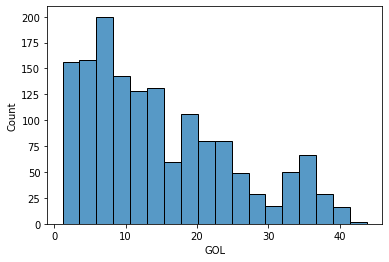

In [29]:
# Comando do Seaborn para visualizar ações da Gol - Histograma
#sns.distplot(acoes_df['GOL'],kde=False, color='blue', bins=100) Visualização padrão
sns.histplot(acoes_df['GOL'])

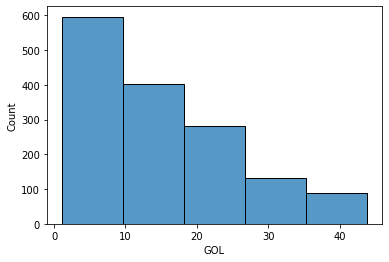

In [30]:
# Visualização mostrando somente 5 faixas de valores- graças ao uso do parâmetro bins(ações da Gol de 2015 até 2021)
sns.histplot(acoes_df['GOL'],bins=5);

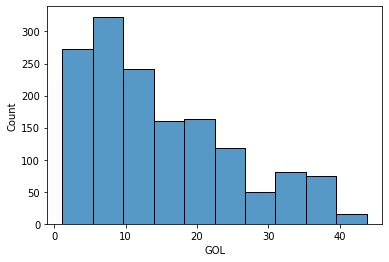

In [31]:
sns.histplot(acoes_df['GOL'], bins=10);

In [32]:
# Comando que mostra a quantidade de colunas
len(acoes_df.columns)

7

In [33]:
# Comando que mostra o array das colunas desconsiderando o zero
np.arange(1,len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

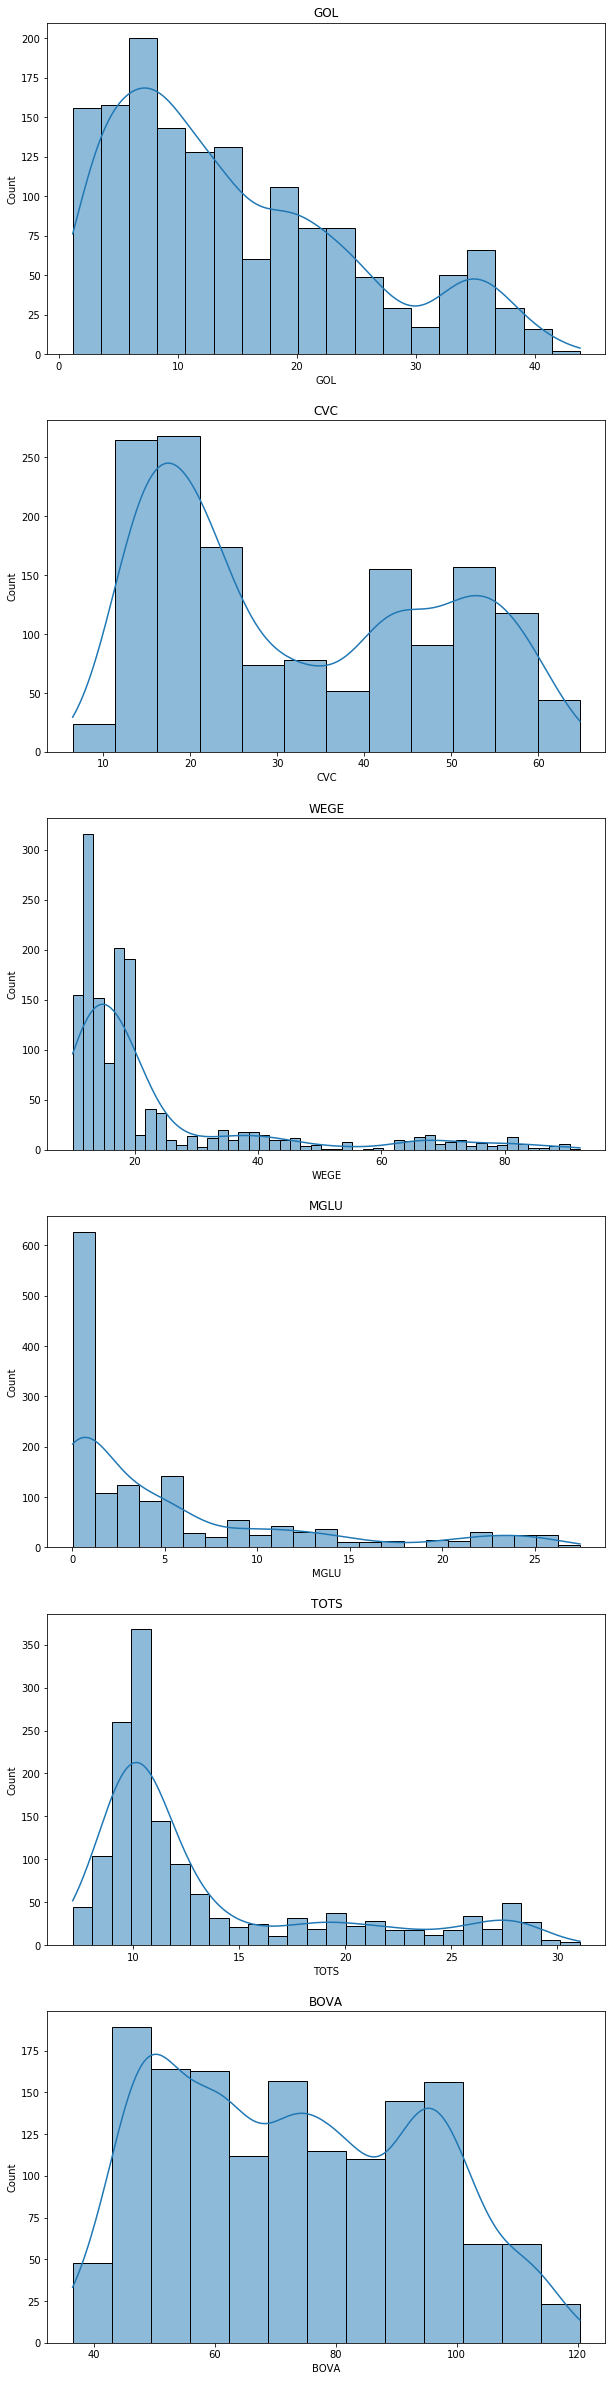

In [34]:
# Gráficos das ações de todas as colunas carregadas nesse dataset
plt.figure(figsize=(10,50))
i= 1
for i in np.arange(1,len(acoes_df.columns)):
    plt.subplot(7,1,i+1)
    sns.histplot(acoes_df[acoes_df.columns[i]],kde=True )
    plt.title(acoes_df.columns[i])


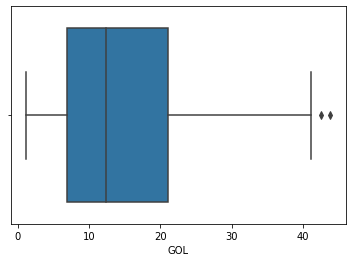

In [35]:
# Gráfico que mostra em boxplot os valores das ações da Gol de 2015 a 2021 
sns.boxplot(x= acoes_df['GOL']);

In [36]:
acoes_df[['GOL']].describe()

,GOL
count,1500.000000
mean,14.890327
std,10.205735
min,1.160000
25%,6.897500
50%,12.355000
75%,21.022501
max,43.790001


C:\Users\Anderson Lomba\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Anderson Lomba\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Anderson Lomba\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\User

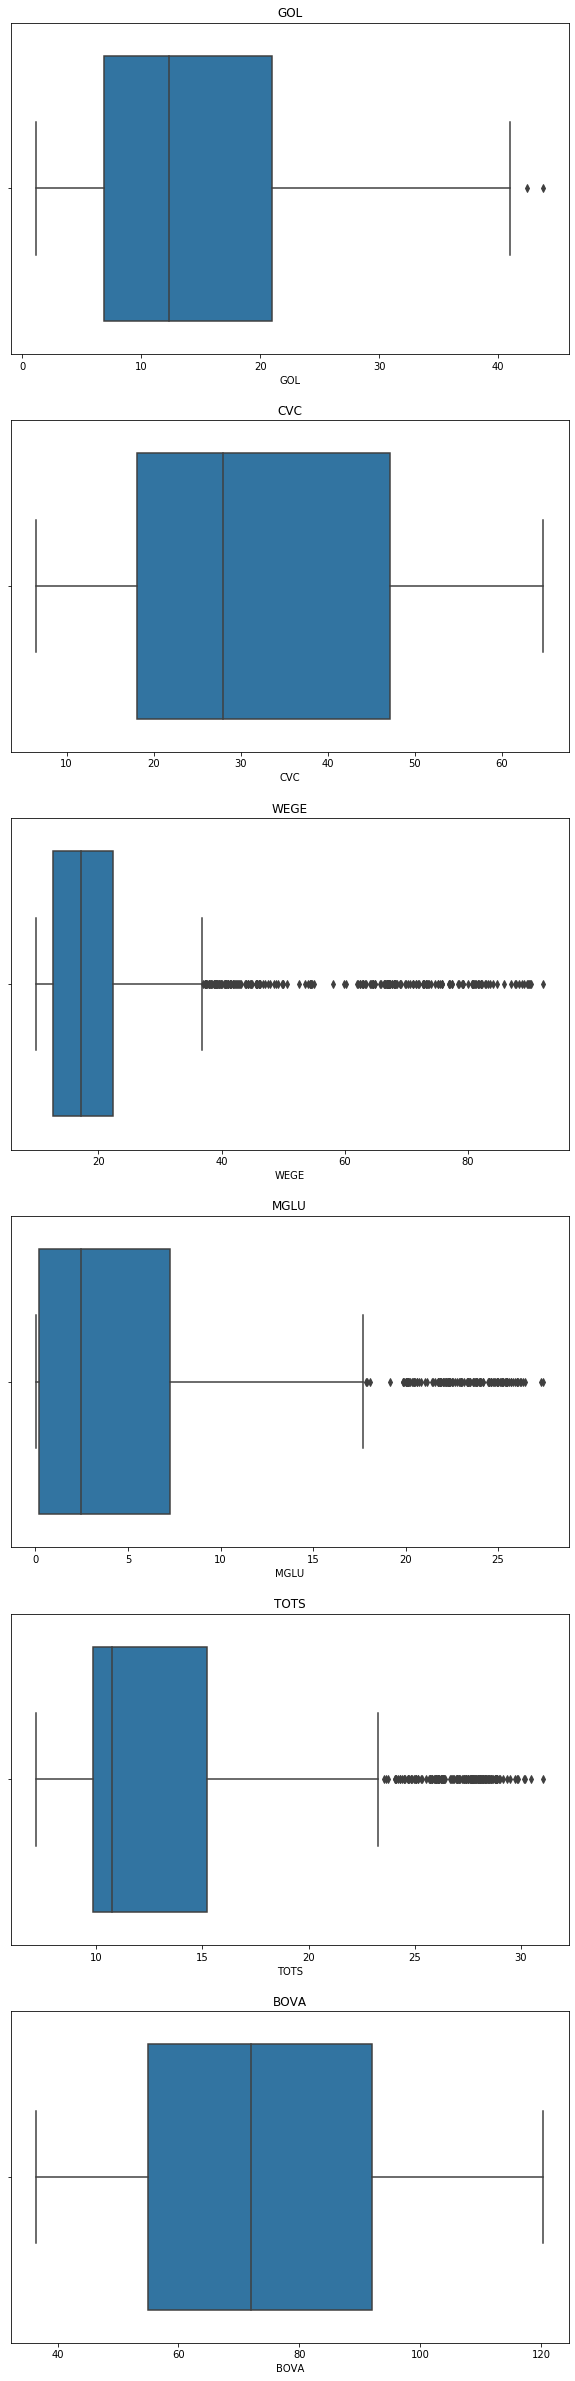

In [37]:
# Gráficos das ações em Boxplot de todas as colunas carregadas do dataset
plt.figure(figsize=(10,50))
i= 1
for i in np.arange(1,len(acoes_df.columns)):
    plt.subplot(7,1,i+1)
    sns.boxplot(acoes_df[acoes_df.columns[i]])
    plt.title(acoes_df.columns[i])

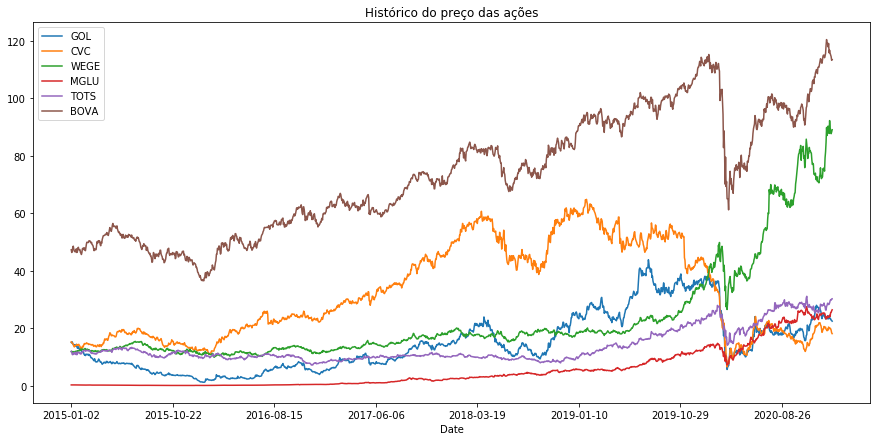

In [38]:
acoes_df.plot(x= 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [39]:
# Gráfico normalizado das ações
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1495,2021-01-19,23.24,19.870001,89.599998,24.080000,29.520000,115.629997
1496,2021-01-20,23.23,19.799999,88.699997,25.420000,29.870001,115.070000
1497,2021-01-21,22.76,19.260000,87.650002,25.490000,29.750000,114.459999
1498,2021-01-22,22.67,18.370001,88.260002,26.000000,30.150000,113.180000


In [40]:
acoes_df_normalizado = acoes_df.copy() 
for i in acoes_df_normalizado.columns[1:]:
    acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [41]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1495,2021-01-19,1.550367,1.307237,7.563637,103.431093,2.478443,2.446678
1496,2021-01-20,1.549700,1.302632,7.487662,109.186811,2.507829,2.434829
1497,2021-01-21,1.518346,1.267105,7.399026,109.487481,2.497754,2.421921
1498,2021-01-22,1.512342,1.208553,7.450520,111.678091,2.531337,2.394837


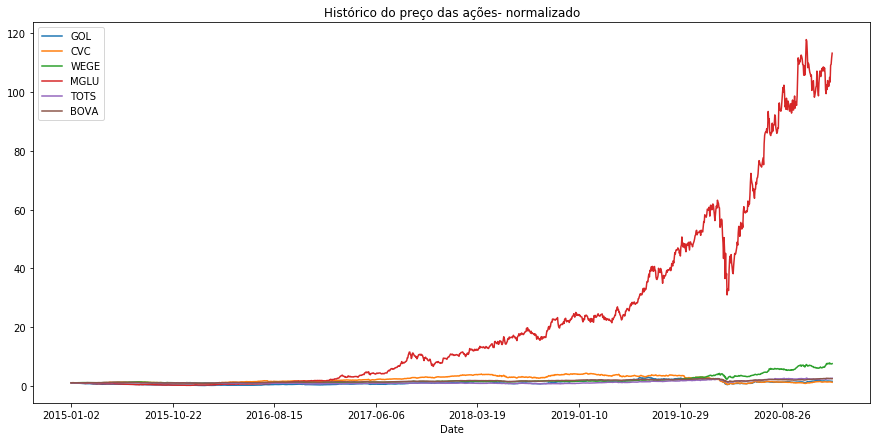

In [42]:
acoes_df_normalizado.plot(x= 'Date', figsize = (15,7), title = 'Histórico do preço das ações- normalizado');

In [47]:
# Gráfico dinâmico das ações
# Para usar as configurações: Zoom para ver mais detalhadamente. Compare data on hover para 
# fazer comparações entre as ações e para retornar ao padrão só clicar em Autoscale.
figura = px.line(title= 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
    figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [48]:
figura = px.line(title= 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
    figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()